<a href="https://colab.research.google.com/github/agmCorp/colab/blob/main/DatamatrixCanny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se detectaron 81 líneas en total. Filtrando por horizontales...
¡Éxito! Se marcaron 2 fallas de impresión en rojo.


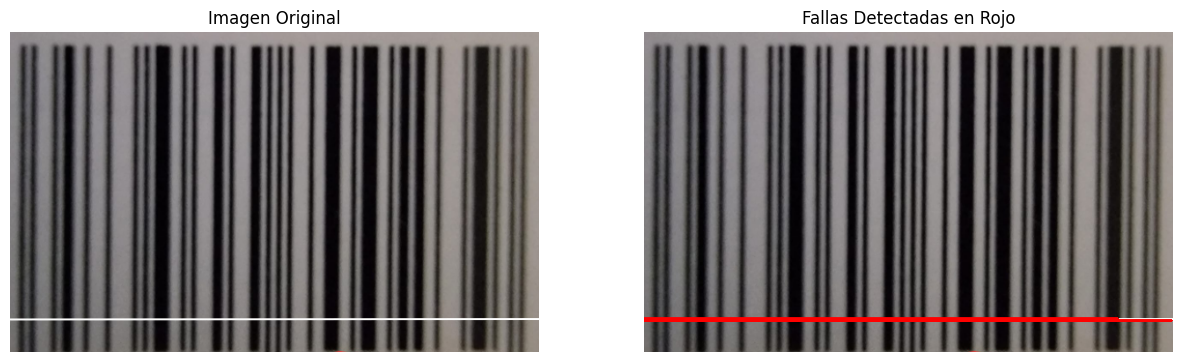

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Cargar la imagen ---
image_path = '/content/sample_data/wrong3.png'
try:
    original_image = cv2.imread(image_path)
    # Hacemos una copia para dibujar sobre ella y mantener la original intacta.
    output_image = original_image.copy()
except Exception as e:
    print(f"Error al cargar la imagen: {e}")
    print("Por favor, asegúrate de que el archivo 'SampleImage.png' ha sido subido a Colab.")
    original_image = None

if original_image is not None:
    # --- 2. Preprocesamiento de la imagen ---
    # Convertir a escala de grises para la detección de bordes.
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Detección de bordes con el algoritmo de Canny.
    # Los umbrales (50, 150) pueden necesitar ajuste para otras imágenes.
    edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

    # --- 3. Detección de líneas con la Transformada de Hough ---
    # Usamos HoughLinesP que devuelve los puntos de inicio y fin de las líneas.
    # Parámetros:
    #   - threshold: Mínimo de "votos" para considerar una línea.
    #   - minLineLength: Longitud mínima de una línea en píxeles.
    #   - maxLineGap: Máximo espacio permitido entre segmentos para unirlos en una sola línea.
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

    # --- 4. Filtrar y dibujar las líneas de falla ---
    if lines is not None:
        print(f"Se detectaron {len(lines)} líneas en total. Filtrando por horizontales...")
        found_faults = 0
        for line in lines:
            x1, y1, x2, y2 = line[0]

            # Calcular el ángulo de la línea.
            angle = np.rad2deg(np.arctan2(y2 - y1, x2 - x1))

            # Filtrar para mantener solo las líneas casi horizontales.
            # Aceptamos un pequeño margen de error (ej. entre -1 y 1 grados).
            if abs(angle) <= 1:
                # Dibujar la línea detectada en rojo sobre la imagen de salida.
                # El color es (0, 0, 255) para rojo en formato BGR.
                # El grosor de la línea es 2 píxeles.
                cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
                found_faults += 1

        if found_faults > 0:
            print(f"¡Éxito! Se marcaron {found_faults} fallas de impresión en rojo.")
        else:
            print("No se encontraron fallas horizontales que cumplan los criterios.")

    else:
        print("No se detectó ninguna línea en la imagen con los parámetros actuales.")


    # --- 5. Mostrar el resultado ---
    # Convertir las imágenes de BGR (OpenCV) a RGB (Matplotlib) para mostrarlas correctamente.
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    output_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

    # Crear una figura para mostrar ambas imágenes.
    plt.figure(figsize=(15, 10))

    plt.subplot(1, 2, 1)
    plt.title('Imagen Original')
    plt.imshow(original_rgb)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Fallas Detectadas en Rojo')
    plt.imshow(output_rgb)
    plt.axis('off')

    plt.show()